In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np

In [9]:
diabetes1_df = pd.read_csv('diabetes.csv')
diabetes1_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes1_df.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [11]:
diabetes2_df = pd.read_csv('train.csv')
diabetes2_df.head(5)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [12]:
diabetes2_renamed = diabetes2_df.rename(columns = {'no_times_pregnant':'Pregnancies', 'glucose_concentration':'Glucose', 'blood_pressure':'BloodPressure', 'skin_fold_thickness':'SkinThickness', 'serum_insulin': 'Insulin', 'bmi':'BMI', 'diabetes pedigree': 'DiabetesPedigreeFunction', 'age': 'Age', 'diabetes': 'Outcome'})
diabetes2_renamed.head()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [13]:
diabetes2_clean = diabetes2_renamed.drop('p_id', axis =1)
diabetes2_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,112,68,22,94,34.1,0.315,26,0
1,11,143,94,33,146,36.6,0.254,51,1
2,2,93,64,32,160,38.0,0.674,23,1
3,1,120,80,48,200,38.9,1.162,41,0
4,3,128,72,25,190,32.4,0.549,27,1
...,...,...,...,...,...,...,...,...,...
609,1,189,60,23,846,30.1,0.398,59,1
610,1,84,64,23,115,36.9,0.471,28,0
611,2,92,52,0,0,30.1,0.141,22,0
612,0,125,96,0,0,22.5,0.262,21,0


In [14]:
diabetes2_clean.count()

Pregnancies                 614
Glucose                     614
BloodPressure               614
SkinThickness               614
Insulin                     614
BMI                         614
DiabetesPedigreeFunction    614
Age                         614
Outcome                     614
dtype: int64

In [15]:
test_df = pd.read_csv('test.csv')
test_df.head(5)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


In [16]:
test_renamed = test_df.rename(columns = {'no_times_pregnant':'Pregnancies', 'glucose_concentration':'Glucose', 'blood_pressure':'BloodPressure', 'skin_fold_thickness':'SkinThickness', 'serum_insulin': 'Insulin', 'bmi':'BMI', 'diabetes pedigree': 'DiabetesPedigreeFunction', 'age': 'Age'})
test_renamed.head()

,p_id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


In [17]:
test_clean = test_renamed.drop('p_id', axis =1)
test_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,12,140,85,33,0,37.4,0.244,41
1,6,102,90,39,0,35.7,0.674,28
2,7,97,76,32,91,40.9,0.871,32
3,7,179,95,31,0,34.2,0.164,60
4,6,87,80,0,0,23.2,0.084,32
...,...,...,...,...,...,...,...,...
149,0,129,110,46,130,67.1,0.319,26
150,1,199,76,43,0,42.9,1.394,22
151,2,88,74,19,53,29.0,0.229,22
152,0,126,84,29,215,30.7,0.520,24


In [14]:
test_clean.count()

Pregnancies                 614
Glucose                     614
BloodPressure               614
SkinThickness               614
Insulin                     614
BMI                         614
DiabetesPedigreeFunction    614
Age                         614
Outcome                     614
dtype: int64

In [18]:
readmission_df = pd.read_csv('diabetic_data.csv')
readmission_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [19]:
readmission_df.count()

encounter_id                101766
patient_nbr                 101766
race                        101766
gender                      101766
age                         101766
weight                      101766
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                  101766
medical_specialty           101766
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101766
diag_2                      101766
diag_3                      101766
number_diagnoses            101766
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride         

In [20]:
readmission_df['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [21]:
readmission_df['weight'].value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [22]:
readmission_drop = readmission_df.drop('weight', axis=1)
readmission_drop

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,MC,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,MC,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,MC,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [2]:
import sys

!$sys.executable -m pip install tensorflow

  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=ff704bc4b9b2412cfa64478dbab5f9ea8930b0c9d54b36226ab57f6f989c6c0a
  Stored in directory: c:\users\stefa\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor


In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

In [23]:
final_diabetes_df = diabetes1_df.append(diabetes2_clean, ignore_index=True)
final_diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
1377,1,189,60,23,846,30.1,0.398,59,1
1378,1,84,64,23,115,36.9,0.471,28,0
1379,2,92,52,0,0,30.1,0.141,22,0
1380,0,125,96,0,0,22.5,0.262,21,0


In [49]:
# Remove diabetes outcome target from features data
y = final_diabetes_df.Outcome.values
X = final_diabetes_df.drop(columns="Outcome").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, stratify=y) 

In [26]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [74]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
33/33 [==============================] - 1s 2ms/step - loss: 0.7402 - accuracy: 0.4624
Epoch 2/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5772
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.6187
Epoch 4/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6361
Epoch 5/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6448
Epoch 6/50
33/33 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.6458
Epoch 7/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6477
Epoch 8/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6466 - accuracy: 0.6506
Epoch 9/50
33/33 [==============================] - 0s 3ms/step - loss: 0.6445 - accuracy: 0.6535
Epoch 10/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6506
Epoch 11/50
33/33 [

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [52]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8542471042471043
Testing Score: 0.5838150289017341


In [54]:
feature_importances = clf.feature_importances_

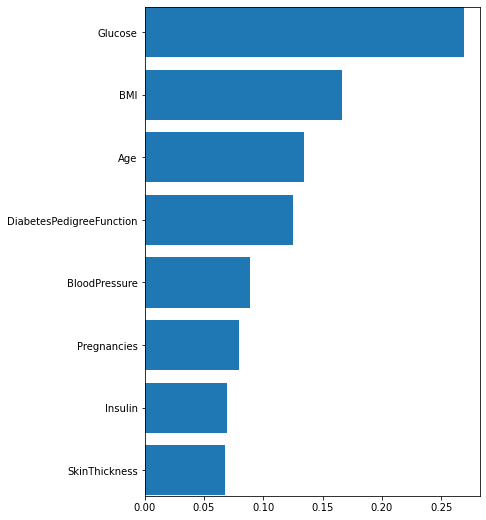

In [61]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(6,9)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [62]:
from sklearn.feature_selection import SelectFromModel

In [63]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500,
                                                 random_state=1))

In [64]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [71]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9104046242774566


In [65]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')


Training Score: 0.6505791505791506
Testing Score: 0.661849710982659


In [66]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7741312741312741
Testing Score: 0.7976878612716763
